<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 3 - Ensamblados y modelos avanzados </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Técnicas de ensamblado: *bagging*, *boosting*, *random forest*.
* Redes Neuronales Convolucionales vs *Feed Forward*
* Aprendizaje no supervisado: *hidden models*
* Aprendizaje sobre secuencias

**Intengrantes**
* César Quiroz Mansilla
* Jorge Contreras Cabreras
 

## 1. Calidad de un vino

Existen muchas variedades de vino existentes debido a los distintos gustos que tienen las personas. Del gusto se desprende la calidad que una persona le podría asignar a un vino, el cual proviene del gusto de la persona en particular, o bien, a la gran cantidad de quı́micos y procesos que se aplican a la producción de vino. Para el área de negocios, el estimar cuál es la calidad de un vino en base a la apreciación del público es una tarea bastante difı́cil.  
Para esta actividad se trabajará con dos *datasets* asociados a las variantes tinto y blanco del vino portugués
”Vinho Verde”. Debido a temas privados solo se cuenta con las caracterı́stcas fisioquı́micas asociadas a un
vino en particular, los cuales corresponden a 11 atributos numéricos descritos en el siguiente __[link](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)__.

Este problema puede ser abordado como clasificación de 11 clases o de regresión, ya que el atributo a estimar,
*quality*, tiene un dominio como valor entero 0 y 10. La forma de resolverlo será a través de **ensamblados**.

<img src="https://uploads.toptal.io/blog/image/92064/toptal-blog-image-1454584112948-fc1d35939aa1886bf30c816b3ac20e21.jpg" title="Title text" width="20%"  />


#### a) Carge los dos dataset en un único dataframe de pandas, además de agregar una columna indicando si es vino tinto o blanco. Describa el dataset a trabajar.


In [19]:
import pandas as pd
df_red = pd.read_csv("winequality-red.csv",sep=";") #Vinos tintos
print("Cantidad de Vinos Tintos",len(df_red))
df_red.loc[:,'Tipo'] = 1
df_white = pd.read_csv("winequality-white.csv",sep=";") #Vinos blanco
print("Cantidad de Vinos Blancos",len(df_white))
df_white.loc[:,'Tipo'] = 2
df = pd.concat([df_red,df_white], axis=0)
print("Cantidad total de ejemplos", len(df))
df.head()

Cantidad de Vinos Tintos 1599
Cantidad de Vinos Blancos 4898
Cantidad total de ejemplos 6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Variables de entrada (basadas en pruebas fisicoquímicas):

1. acidez fija 
2. acidez volátil 
3. ácido cítrico 
4. azúcar residual 
5. cloruros 
6. dióxido de azufre libre 
7. dióxido de azufre total 
8. densidad 
9. pH 
10. sulfatos 
11. alcohol 
12. Tipo

Variable de salida (basada en datos sensoriales): 
13. calidad (puntuación entre 0 y 10)

#### b) Aborde este problema como si fuera de clasificación con multiples clases para predecir el valor de calidad de un vino, es decir, utilice las distintas caracterı́sticas fisioquı́micas presentes en los datos para estimar la etiqueta ¿Cuántas clases son y cuántos ejemplos hay por clase? ¿Qué sucede con predecir si un vino tiene calidad mínima (0) o máxima(10)? Además para el propósito académico de esta actividad cree un conjunto de pruebas (20%)  para evaluar la generalización final del modelo y otro de validación (20%) si estima conveniente. 

In [20]:
print("valores de variable calidad \n", df.quality.value_counts())
df = df.sample(frac=1,random_state=44) #Desordena los datos
#Conjunto de entrenamiento y validacion 1300 ejemplos cada uno (20%)
df_train = df.iloc[:-2600]  #todo el conjunto menos los ultimos 2600
print("Cantidad ejemplos conjunto entrenamiento: ",len(df_train))
df = df.iloc[-2600:]    #ultimos 2600 valores del conjunto
df_test = df.iloc[:-1300] #todo el conjunto menos los ultimos 1300
df_val = df.iloc[-1300:]  #ultimos 1300 valores del conjunto
print("Cantidad ejemplos conjunto validación: ",len(df_val))
print("Cantidad ejemplos conjunto pruebas: ",len(df_test))

valores de variable calidad 
 6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64
Cantidad ejemplos conjunto entrenamiento:  3897
Cantidad ejemplos conjunto validación:  1300
Cantidad ejemplos conjunto pruebas:  1300


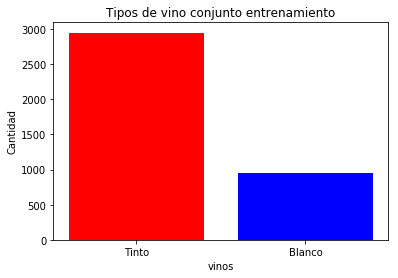

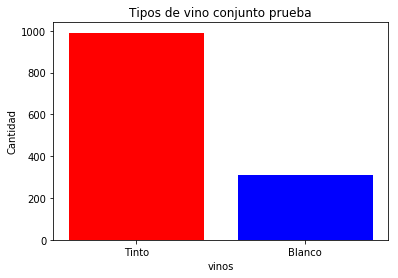

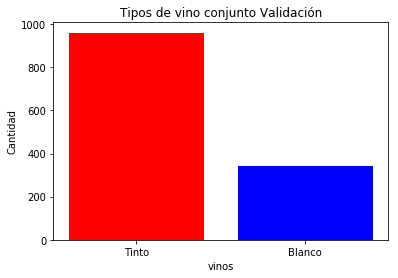

In [21]:
#Verificar si la cantidad de vinos esta bien distribuida.
import matplotlib.pyplot as plt
import numpy as np
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
#Conjunro entretamiento
eje_x=["Tinto","Blanco"]
X = np.arange(2)
plt.bar(X,df_train.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto entrenamiento") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()
#Conjunto prueba
plt.bar(X,df_test.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto prueba") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()
#Conjunto de validación
plt.bar(X,df_val.Tipo.value_counts(), align='center',color=["r","b"])
ax =plt.axes()
ax.set_xticks(X)
ax.set_xticklabels(eje_x)
plt.title("Tipos de vino conjunto Validación") #titulo
plt.xlabel('vinos') #Nombre eje x
plt.ylabel('Cantidad') #Nombre eje y
plt.show()

In [22]:
#Creacion conjuntos
Y_train = df_train['quality'].values  #Variable de salida entrenamiento
Y_val = df_val['quality'].values  #Variable de salida validacion
Y_test = df_test['quality'].values  #Variable de salida test
X_train = df_train.drop(["quality"],axis=1).values #Variable de entrada entrenamiento
X_val = df_val.drop(["quality"],axis=1).values #Variable de entrada validacion
X_test = df_test.drop(["quality"],axis=1).values #Variable de entrada test

#### c) Entrene un solo Árbol de Clasificación de múltiples niveles para resolver el problema. Defina un Árbol **no regularizado** (como el que no tiene límites en su profundidad) y otro Árbol **regularizado** (variando los hiper-parámetros que prefiera, por ejemplo, los más comunes como la profundidad, el número mínimo de datos para realizar *split* o el número mínimo de datos en cada hoja), recuerde que las **decisiones** no pueden ser basadas mirando el conjunto de pruebas. Debido al desbalanceo que se produce en las clases mida la métrica F1-score [[2]](#refs) sobre el conjunto de entrenamiento y de pruebas.

In [23]:
from ipywidgets import interactive
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.metrics import f1_score

#Arbol no regularizado
print("Resultados arbol no regularizado")
model= Tree()
model.set_params(criterion='gini',splitter='best')
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

#Arbol regularizado
print("Resultados arbol regularizado modificando la profundidad")
def visualize_border_interactive(param):
    model = train_model(param)

def train_model(param):
    model= Tree()
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_val)
    print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
    y_pred=model.predict(X_train)
    print("f score train",f1_score(Y_train, y_pred,average='micro'))
    return model

#Profundidad
p_min = 1
p_max = 35 
interactive(visualize_border_interactive,param=(p_min,p_max))

Resultados arbol no regularizado
f score Validation 0.5707692307692308
f score train 1.0
Resultados arbol regularizado modificando la profundidad


interactive(children=(IntSlider(value=18, description='param', max=35, min=1), Output()), _dom_classes=('widge…

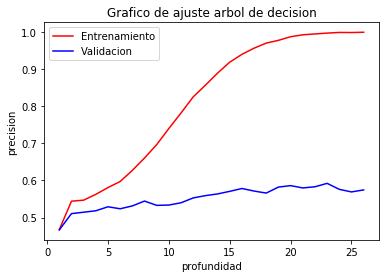

In [24]:
# Grafico de ajuste del árbol regularizado
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 27))

for deep in max_deep_list:
    model= Tree()
    model.set_params(max_depth=deep,criterion='gini',splitter='best') #se probo con entropy y se llego a lo mismo
    model.fit(X_train,Y_train)
    train_prec.append(model.score(X_train,Y_train))
    eval_prec.append(model.score(X_val,Y_val))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='Entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Validacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('profundidad')
plt.show()

+ Calcule la puntuación F1, también conocida como puntuación F equilibrada o medida F
+ El puntaje de F1 se puede interpretar como un promedio ponderado de la precisión y el recuerdo, donde un puntaje de F1 alcanza su mejor valor con 1 y el peor puntaje con 0. La contribución relativa de la precisión y el recuerdo al puntaje de F1 son iguales. La fórmula para el puntaje de F1 es:
+ En el caso de clases múltiples y etiquetas múltiples, este es el promedio de la puntuación de F1 de cada clase con ponderación según el average parámetro.
+ Valores que se le puede dar a average:
+ El árbol no regularizado alcanza una confianza del 60%  mientras que el regularizado con profundidad 10 alcanza una confianza del 55% pero produce mucho menor overfiting.

'binary': Solo informe los resultados para la clase especificada por pos_label. Esto es aplicable solo si los objetivos ( y_{true,pred}) son binarios.

'micro': Calcule las métricas globalmente contando el total de verdaderos positivos, falsos negativos y falsos positivos.

'macro': Calcule las métricas para cada etiqueta y encuentre su media no ponderada. Esto no tiene en cuenta el desequilibrio de la etiqueta.

'weighted': Calcule las métricas para cada etiqueta y encuentre su ponderación promedio por soporte (el número de instancias reales para cada etiqueta). Esto altera 'macro' para tener en cuenta el desequilibrio de la etiqueta; puede dar lugar a una puntuación F que no se encuentra entre la precisión y la recuperación.

'samples': Calcule las métricas para cada instancia y encuentre su promedio (solo significativo para la clasificación de varias capas en la que difiere accuracy_score).

#### d) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **Bagging**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)*) ¿Qué debería suceder? ¿Se visualiza *overfitting*? Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [25]:
from numpy.core.umath_tests import inner1d
from sklearn.ensemble import BaggingClassifier

print("Arbol no regularizado")
model = BaggingClassifier(base_estimator=Tree(max_depth=None), n_estimators=100, n_jobs=-1)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

print("Arbol regularizado")
model = BaggingClassifier(base_estimator=Tree(max_depth=10), n_estimators=100, n_jobs=-1)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

C:\Users\Jorge\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  """Entry point for launching an IPython kernel.


Arbol no regularizado
f score Validation 0.6538461538461539
f score train 1.0
Arbol regularizado
f score Validation 0.6123076923076923
f score train 0.8604054400821144


+ SE entreno con 100 estimadores y en el caso del arbol regularizado se uso profundidad 10
+ Se concluye que Bagging consigue mejores resultados con un arbol no regularizado.
+ La confianza del Baggling en el arbol no regularizado para el conjunto de validación es 65% vs tan solo un 62% del arbol regularizado.

#### e) Entrene un ensamblado de árboles de múltiples niveles, mediante la técnica de **AdaBoost**, compare el Árbol **no regularizado** con el **regularizado** (*seteando los hiper-parámetros en base a lo experimentado anteriormente en c)* ¿Se visualiza *overfitting*? ¿Qué técnica se utiliza, *re-muestrear* o *pesar* ejemplos? ¿Qué le parece más sensato?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen del F1-score de entrenamiento y de pruebas en función de este hiper-parámetro. Compare y analice con la técnica utilizada en d).

In [26]:
from sklearn.ensemble import AdaBoostClassifier
print("Arbol no regularizado")
model = AdaBoostClassifier(base_estimator=Tree(max_depth=None), n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))
print("Arbol regularizado")
model = AdaBoostClassifier(base_estimator=Tree(max_depth=10), n_estimators=100)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

Arbol no regularizado
f score Validation 0.58
f score train 1.0
Arbol regularizado
f score Validation 0.6492307692307693
f score train 0.9997433923530922


+ Se consiguieron mejores resultados con el arbol regularizado con un 66% de confianza.
+ Por lo tanto entrenar un AdaBoost con un arbol regularizado es mejor.

#### f) Pruebe otra técnica de ensamblado dedicada a árboles de decisión, que combina el muestreo *boostrap* de *Bagging* con muestreo sobre las *features*: **Random Forest**, compare el Árbol **no regularizado** con el **regularizado** ¿Se visualiza *overfitting*?. Varíe la cantidad de árboles de decisión utilizados en el ensamblado (*n estimators*), realice un gráfico resumen el F1-score de entrenamiento y de pruebas en función de este hiper-parámetro.

In [27]:
from sklearn.ensemble import RandomForestClassifier
print("Arbol no regularizado")
model = RandomForestClassifier(n_estimators=100, max_depth=None,n_jobs=-1,oob_score = True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

print("Arbol regularizado")
model = RandomForestClassifier(n_estimators=100, max_depth=10,n_jobs=-1,oob_score = True)
model.fit(X_train,Y_train)
y_pred=model.predict(X_val)
print("f score Validation",f1_score(Y_val, y_pred,average='micro'))
y_pred=model.predict(X_train)
print("f score train",f1_score(Y_train, y_pred,average='micro'))

Arbol no regularizado
f score Validation 0.666923076923077
f score train 1.0
Arbol regularizado
f score Validation 0.6230769230769231
f score train 0.842442904798563


+ Se consiguen resultados muy similares a Baggling pero esta vez en el arbol regularizado se reduce bastante en overfiting lo cual es muy importante a la hora de escojer un modelo.

#### g) Verifique que el **OOB error** (*out of bag error*) de los ensambladores que utilizan la técnica *boostrap* puede ser una alternativa como métrica de generalización, compárelo con el error calculado sobre el conjunto de pruebas y validación (o en su defecto *cross validation*).

In [28]:
oob_error = 1 - model.oob_score_
test_error = 1- model.score(X_test,Y_test)
val_error = 1- model.score(X_val,Y_val)
train_error = 1- model.score(X_train,Y_train)
print("OOB error: ",oob_error)
print ("Val error: ",val_error)
print("Test error: ",test_error)
print("Train error: ",train_error)

OOB error:  0.38414164742109314
Val error:  0.3769230769230769
Test error:  0.38538461538461544
Train error:  0.15755709520143701


+ OBB Consigue un error muy similar a los obtenidos en el conjunto de test y validación.

#### h) Entrene alguna otra máquina de aprendizaje, elegida por usted de entre todas las vistas en el curso, para resolver el problema. Elija los hiper-parámetros que estime convenientes intentando aumentar el *F1-scor*e obtenido por los algoritmos anteriores ¿Se logra una mejora? ¿Por qué?

In [29]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    k=param
    print("Parametro K = ",k)
    model = KNeighborsClassifier()  
    model.set_params(n_neighbors=param)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_val)
    print("f score",f1_score(Y_val, y_pred,average='micro'))
    return model

p_min = 0 #define your range
p_max = 30 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=15, description='param', max=30), Output()), _dom_classes=('widget-inter…

+ Se Utilizo K-nn con resultados de solo el 50% de accuaracy

In [30]:
from sklearn.svm import SVC as SVM #SVC is for classification
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='rbf')
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_val)
    print("f score",f1_score(Y_val, y_pred,average='micro'))
    return model
p_min = -6 #define your range
p_max = 6 #define your range

interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=6, min=-6), Output()), _dom_classes=('widget…

+ Se entreno una CVM con resultados solo de un 50%  de accuaracy
#### i) Compare y analice las distintas maneras con las que se resolvió el problema definido en b), por ejemplo incluya las decisiones que conlleva y los resultados que reflejan.


+ Primero se agrego la fila tipo, donde 1 corresponde si es tinto y 0 cuando es blanco.
+ Se elimina la columna alcohol.
+ se entreno un arbol de desicion regularisado donde se escoje que la profundidad 9 es la mejor.
+ Se entreno en ensamblado de arboles de decisión con 100 arboles con una confianza del 60%.
+ Se entreno un adaboots con una confienza del 63% pero presenta mucho overfiting.
+ Se entrena un random Forest con una confianza del 60% pero presenta el menor overfiting
+ Se entreno un K-nn.
+ Se entreno un SVM.
+ Tanto k-nn y SVM no lograron superar el 50% de confianza

Finalmente se conseguieron los mejores resultados respecto al conjunto de pruebas con adaboots y random forest con una confianza del 63% y 60%

#### j) Defina otra forma de combinar los valores que entregan los ensamblados al hacer predicciones y compare con lo que se hace actualmente, por ejemplo *Bagging* realiza el voto de la mayoría para clasificación y promedio para regresión, *AdaBoost* realiza una combinación ponderada de cada clasificador dependiendo de su *habilidad* (desempeño para clasificar el conjunto de entrenamiento).

In [31]:
def combine_predictions(predictions):
    return #define !
list_estimators = model.estimators_
list_predictions = [estimator.predict(X_test) for estimator in list_estimators]
new_predictions = combine_predictions(list_predictions)
#measure f1 score
f1_score(Y_test, new_predictions)

ValueError: Expected array-like (array or non-string sequence), got None

#### k) Utilice la técnica de ensamblado para seleccionar características, para ésto defina un criterio para estimar la importancia de los distintos atributos en el ensamblado, impleméntelo sobre alguno de los ensambladores entrenados para resolver el problema definido en b). Realice un *ranking* de importancia de atributos y seleccione las $k$ características más relevantes.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

columnas = list(df_train.columns.values)
k = 5  # número de atributos a seleccionar
modelo = ExtraTreesClassifier()
era = RFE(modelo, k)
era = era.fit(X_train, Y_train)
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
print("Los mejores 5 atributos son: \n")
print(atributos)

Los mejores 5 atributos son: 

['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


##### l) Entrene la máquina de aprendizaje definida en h) sobre las $k$ carecterísticas derivadas del punto anterior ¿Mejora los resultados sobre ésta máquina de aprendizaje?

In [33]:
X_train = df_train.drop(["quality","alcohol","fixed acidity","citric acid","pH","Tipo","residual sugar","free sulfur dioxide"],axis=1).values #Variable de entrada entrenamiento
X_val = df_val.drop(["quality","alcohol","fixed acidity","citric acid","pH","Tipo","residual sugar","free sulfur dioxide"],axis=1).values #Variable de entrada validacion
X_test = df_test.drop(["quality","alcohol","fixed acidity","citric acid","pH","Tipo","residual sugar","free sulfur dioxide"],axis=1).values #Variable de entrada test
# SVM.
def train_model(param):
    model= SVM()
    C = 10**(param)
    print("Param C= ",C)
    model.set_params(C=C,kernel='rbf')
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_val)
    print("f score",f1_score(Y_val, y_pred,average='micro'))
    return model
p_min = -6 #define your range
p_max = 6 #define your range

interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=0, description='param', max=6, min=-6), Output()), _dom_classes=('widget…

In [34]:
def train_model(param):
    k=param
    print("Parametro K = ",k)
    model = KNeighborsClassifier()  
    model.set_params(n_neighbors=param)
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_val)
    print("f score",f1_score(Y_val, y_pred,average='micro'))
    return model

p_min = 0 #define your range
p_max = 30 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

interactive(children=(IntSlider(value=15, description='param', max=30), Output()), _dom_classes=('widget-inter…

+ A pesar se solo trabajar con los 5 parametros más inflyentes tanto la SVM y K-NN no mejoran significativamente.

En concluión en data frame utilizado para entrenar maquinas con el fin de lograr clasificar la calidad del vino carece de variables influyentes lo sufientemente buenas para lograr una confienza de al menos el 70%, además los mejores resultasdos se consiguieron ensamblando arboles de clasificación.

<a id="segundo"></a>
## 2. Redes Convolucionales sobre imágenes
---
Las redes neuronales hoy en día han sido extendidas a numerosas aplicaciones gracias a la arquitectura definida para cada tipo de problema. Las redes neuronales que aplican la operación de convolución [[3]](#refs) o convoluciones en sus capas son concidas como *CNN* o *ConvNets*, lo cual se especializa en trabajar en datos con forma matricial (ya sea bi-dimensional o tri-dimensional), lo cual se adecúa perfectamente a imágenes (matrices), ya que gracias a su conectividad local se especializan en reconocer patrones sobre los datos de manera espacial, como refleja la siguiente imagen:

<img src="https://cdn-images-1.medium.com/max/1600/1*N4h1SgwbWNmtrRhszM9EJg.png" title="Title text" width="90%" />


En esta actividad trabajará con un extracto bastante pequeño del dataset conocido como **101-Food**[[4]](#refs), el cual consta de mil imágenes pertenecientes a 3 clases (*Hambuger, Hot Dog* y *Pizza*) separados en conjunto de entrenamiento y validación.  
El extracto pequeño del dataset con el que se trabajará deberá ser descargado del siguiente __[link](https://www.dropbox.com/s/56xqazmhbh0doi7/food_data.zip?dl=0)__ a través de Dropbox.

> a) Construya funciones para leer los datos y cargarlos al momento de entrenar (durante cada *epoch*), para ésto utilice *Image Data Generator* de keras.

In [5]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Se tiene un conjunto de entrenamiento de 2400 imágenes, repartidas equitativamente para cada clase, es decir, hay 800 imágenes de hamburguesas, 800 de pizzas y 800 de hot dogs. Lo mismo sucede para el conjunto de validación, el cual se encuentra compuesto por 600 imagenes (200 cada clase).

> b) Utilice la red tradicional (*Feed Forward*) entregada en el código para ser entrenada sobre los datos vectorizados, esto es que cada imagen queda representada como un vector gigante, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación.

In [2]:
from keras.models import Sequential
from keras.layers import *
model = Sequential()
model.add(Flatten(input_shape=train_generator.image_shape)) #full dense
model.add(BatchNormalization()) #to normalize the input..
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu')) #128
model.add(Dropout(0.25))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)
#print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator)[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 67500)             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 67500)             270000    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               17280256  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 387       
Total para

In [3]:
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=1)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=10)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=50)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=100)[1])

Accuracy validation:  0.40625
Accuracy validation:  0.4647435905077519
Accuracy validation:  0.4765228421857514
Accuracy validation:  0.4712025317964674


Se evalua el código de acuerdo al conjunto de validación, probando distinos valores para el parámetro "steps" (el parámetro step es el numero de batch de las muestras para predecir antes de parar).

En general, el accuracy es mayor al 40%, pero se ve que este se estabiliza a medida que aumentan los steps (lo cuál resulta lógico) en un 47% de accuracy, valor que es un poco mayor al random (33%), lo cual indica que el modelo no presenta un resultado esperado óptimo, y quizás sea necesario buscar otras formas de generar el modelo.

> c) Utilice la red convolucional (**CNN**) entregada en el código para ser entrenada sobre los datos brutos, matrices RGB de píxeles, y las 3 clases a las que se enfrenta. Evalúe el modelo con la métrica *accuracy* sobre el conjunto de validación. Compare.

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=25,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
__________

In [22]:
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=1)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=10)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=50)[1])
print("Accuracy validation: ",model.evaluate_generator(generator=validation_generator,steps=100)[1])

Accuracy validation:  0.84375
Accuracy validation:  0.7499999984716758
Accuracy validation:  0.728426395333963
Accuracy validation:  0.7300632912901384


Ocupando CNN, el valor del accuracy el altísimo (en comparación con el modelo anterior) para un valor de "steps" pequeño, sin embargo, mientras se va aumentando los "steps", va tendiendo a un valor, tal como ocurrió con el modelo anterior, valor que resulta similar al del accuracy presente en cada epoch, quedando en un resultado de 72-73% de accuracy, lo cual indica una notable mejora con respecto al modelo anterior de red neuronal tradicional.

In [23]:
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)
confusion_matrix

array([[57, 86, 57],
       [55, 71, 74],
       [58, 93, 49]], dtype=int64)

La matriz anterior indica que de las 200 imagenes de hamburguesas, 57 fueron correctamente predecidas, 86 fueron predecidas como hot dogs  y 57 como pizzas. De las 200 imágenes de hot dogs, 55 fueron clasificadas como hamburguesas, 71 como hot dogs y 74 como pizzas. Y finalmente, de las 200 imágenes de pizzas, 58 fueron clasificadas como hamburguesas, 93 como hot dogs y 49 fueron correctamente clasificadas. Lo anterior muestra que la clase que domina es la de hot dogs, ya que se predicen mucho más que las demás.

> d) Genere un conjunto datos con incorrecta etiquetación de manera manual y vea si el modelo convolucional se sigue comportando de la misma manera. Para esto tome 100 imágenes aleatorias de entrenamiento de la carpeta *hot dog* y 100 imágenes aleatorias de entrenamiento de la carpeta *hamburger* e intercambielas, sin manipular las imágenes de la carpeta *pizza* y con el conjunto de validación intacto. Genere las matrices de confusión en el conjunto de validación para visualizar cómo afectó al modelo la corrupción realizada a los datos.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255) #no transformation
train_generator = train_datagen.flow_from_directory(
        'food_data2/train',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)
validation_generator = test_datagen.flow_from_directory(
        'food_data2/val',
        target_size=(150, 150),
        color_mode='rgb',
        batch_size=32)

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


Las dimensiones de cada conjunto son identicas que para los conjuntos anteriores, solo difieren en el contenido de las imagenes, que se encuentra alterado de acuerdo al intercambio de 100 imágenes propuesto.

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=train_generator.image_shape,activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(Conv2D(64, (3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(train_generator.class_indices),activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']) # Let's train the model using RMSprop
model.summary()
model.fit_generator(
        train_generator,
        steps_per_epoch=len(train_generator.classes)//train_generator.batch_size, #samples//batch_size
        epochs=10,
        validation_data=validation_generator,
        validation_steps=len(validation_generator.classes)//validation_generator.batch_size)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 148, 148, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 74, 74, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
__________

Debido a problemas técnicos, fue imposible correr todo el modelo, se demoraba muchísimo y dejaba pegado el pc porque ocupaba muchísimos recursos, así que se resumió sólo a 10 epoch, y los resultados de las predicciones del conjunto de validación se comportan de manera similar (considerando los 10 primeros epoch), es decir, aumentan a medida que aumentan los epoch, pero los resultados son más bajos que para el modelo con imagenes normales, aunque no significativamente más bajos, sólo un par de puntos.

In [18]:
from sklearn.metrics import confusion_matrix 
Y_pred = model.predict_generator(validation_generator,len(validation_generator.classes)//validation_generator.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = confusion_matrix(validation_generator.classes, y_pred)
confusion_matrix

array([[86, 78, 36],
       [71, 90, 39],
       [64, 92, 44]], dtype=int64)

De la matriz anterior es posible identificar que las predicciones de las pizzas fueron las que se vieron más afectadas, ya que reducieron mucho su aparición, los hot dogs siguen dominando, pero sus valores se mantuvieron más constantes, pero se predijeron muchas más hamburguesas, aumentando mucho sus apariciones.

Este resultado es esperado, ya que como en el modelo anterior los hot dogs dominaban, al poner ciertas imagenes de hot dogs en las hamburguesas, aumentan las predicciones de estas últimas, pudiendo concluir que las imagenes de los hot dogs son mucho más potentes para el algorimo que las de hamburguesas y las de pizzas.

<a id="tercero"></a>
## 3. [Opcional] Cadenas de Markov
---
> *Dado que esta actividad es opcional, el puntaje obtenido si se realiza será equivalente a un bonus sobre el promedio final de notas de tareas.*

En esta sección emplearemos un modelo **no supervisado** especializado en secuencias, como lo son las cadenas de markov, para modelar series de tiempo, es decir una serie de registros (tı́picamente valores reales) regularmente indexados en el tiempo. Parea ello utilizaremos el dataset denominado “*international airline passengers*” [[5]](#refs). La tarea consiste en predecir el número de pasajeros (miles) en vuelos internacionales.


<img src="https://i.imgur.com/Fyf0LK6.png" title="Title text" width="80%" />

Los datos pueden ser descargados a través del siguiente __[link](https://datamarket.com/data/set/22u3/international-airline-passengers-monthly-totals-in-thousands-jan-49-dec-60#!ds=22u3&display=line)__. También están disponibles en Kaggle a través del siguiente __[link](https://www.kaggle.com/andreazzini/international-airline-passengers)__

Para la actividad se trabajará con la librería de *sklearn* para aprendizaje sobre secuencias HMM (*Hidden Markov Model*), también puede acudir a la documentación online a través del siguiente __[link](https://hmmlearn.readthedocs.io/en/latest/tutorial.html#available-models)__.
```
pip install --upgrade hmmlearn
conda install -c omnia hmmlearn
```

> a) Escriba una función que cargue los datos, los divida en conjuntos de entrenamiento y de pruebas. En base a como trabajan las cadenas de markov ¿Es necesario escalar los datos?

In [50]:
import pandas as pd
name_f = "international-airline-passengers.csv"
dataframe = pd.read_csv(name_f,sep=',',usecols=[1],engine='python',skipfooter = 3)
dataframe[:] = dataframe[:].astype('float32')
X_train, X_test = dataframe[:96].values, dataframe[96:].values

In [51]:
print("El tamaño del conjunto de entrenamiento es de :", X_train.shape[0])
print("El tamaño del conjunto de testing es de :", X_test.shape[0])

El tamaño del conjunto de entrenamiento es de : 96
El tamaño del conjunto de testing es de : 48


> b) Para resolver el problema defina un modelo de cadena de markov de primer orden con estados ocultos (*hidden markov model*) simple con un generador de datos osbervados que e distribuye normal $p(x_t|s_t)=\mathcal{N}(\mu_{s},\sigma_{s})$. Para evaluar mida la log-verosimilitud (*log-likelihood*) del modelo sobre el conjunto de entrenamiento y de pruebas. Comente

In [52]:
from hmmlearn import hmm
import numpy as np
np.random.seed(30)
n_state = 3
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)

C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
      covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
      min_covar=0.001, n_components=3, n_iter=100, params='stmc',
      random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
      verbose=False)

In [66]:
print("score conjunto entrenamiento: ",markov_model.score(X_train))
print("score conjunto testing: ",markov_model.score(X_test))

score conjunto entrenamiento:  -473.0856244427899
score conjunto testing:  -462.7315424655113


Los valores que entrega al evaluar log-likelihood son valores negativos, lo cual es el resultado esperado debido a que estamos trabajando con una distribución discreta. La diferencia entre el conjunto de entrenamiento y el de testing es muy pequeña idicando que el modelo logra una correcta adaptación a los datos.

> c) Analice cualitativamente lo que aprendió el modelo a través de las distribuciones de probabilidad de las observaciones para un estado oculto dado, esto es, $p(x_t|s_t)$, y las distribuciones de probabilidad de transición $p(s_{t+1}|s_t)$. Comente.

C:\Users\Jorge\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


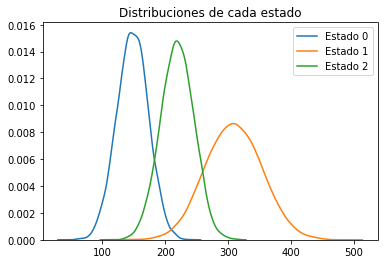

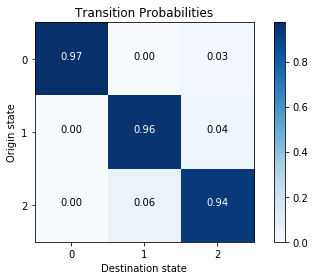

In [54]:
import seaborn as sns
from scipy.stats import norm
import itertools
for i in range(n_state):
    r = norm(markov_model.means_[i], np.sqrt( markov_model.covars_[i,0])).rvs(10000)
    sns.distplot(r,kde=True, hist=False,label="Estado "+str(i))
plt.legend()
plt.title("Distribuciones de cada estado")
plt.show()
def plot_state_matrix(cm, states,title='Transition Probabilities',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(states))
    plt.xticks(tick_marks, states)
    plt.yticks(tick_marks, states)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")
    plt.ylabel('Origin state')
    plt.xlabel('Destination state')
    plt.tight_layout()
plot_state_matrix(markov_model.transmat_,np.arange(n_state))

La matriz de probabilidades anterior muestra que las clases son correctamente predecidas casi en su totalidad, la clase cero es predecida en 0.94, la clase 1 en o.96 y la clase 2 en 0.94, valores muy altos, y por ende la mala clasificación de las predicciones es ínfima.

Mientras que el primer gráfico indica la forma en que se distribuyen los estados, el estado 0 y el estado 100 obtienen valores con casi una misma altura, y el estado 1 se distribuye con numeros mayores, concentrandose en los 300.

> d) Gracias a que el modelo no predice un valor único, sino que una distribucipon de probabilidad (incerteza en cada valor continuo), realice un gráfico de ésto, es decir, visualice el intervalo de confianza en que el modelo predice en cada instante de tiempo, dado el estado oculto, y contrarréstelo con la secuencia original. Hágalo para el conjunto de entrenamiento y de pruebas

In [55]:
X_state = markov_model.predict(X) #predice el estado, no el valor
plt.fill_between(np.arange(X.shape[0]),markov_model.means_[X_state][:,0]-1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0], markov_model.means_[X_state][:,0]+1.96*np.sqrt(markov_model.covars_[X_state])[:,0,0])
plt.plot(markov_model.means_[X_state][:,0],'g*-',label="Prediccion de la media")
plt.plot(X,'ro-',label="Data") #-- here put train or val
plt.legend()
plt.show()

ValueError: Expected 2D array, got 1D array instead:
array=[0 1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

> e) Dado que se ve que el problema no puede ser modelado de manera adecuada con 3 estados distintos (valores que puede tomar el estado oculto en cada instante de tiempo, $s_t$). Experimente con variar la cantidad de éstos  ¿Qué sucede si aumenta hasta tener la misma cantidad de estados que la cantidad de datos? Visualice lo que estime conveniente, además de medir el *log-likelihood* en cada conjunto.

In [74]:
n_states = 10
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)
print("score conjunto entrenamiento para n_state 10: ",markov_model.score(X_train))
print("score conjunto testing para n_state 10: ",markov_model.score(X_test))

n_states = 20
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)
print("score conjunto entrenamiento para n_state 20: ",markov_model.score(X_train))
print("score conjunto testing para n_state 20: ",markov_model.score(X_test))

n_states = 30
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)
print("score conjunto entrenamiento para n_state 30: ",markov_model.score(X_train))
print("score conjunto testing para n_state 30: ",markov_model.score(X_test))

n_states = 40
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)
print("score conjunto entrenamiento para n_state 40: ",markov_model.score(X_train))
print("score conjunto testing para n_state 40: ",markov_model.score(X_test))

n_states = 50
markov_model = hmm.GaussianHMM(n_components=n_state, n_iter=100)
markov_model.fit(X_train)
print("score conjunto entrenamiento para n_state 50: ",markov_model.score(X_train))
print("score conjunto testing para n_state 50: ",markov_model.score(X_test))

score conjunto entrenamiento para n_state 10:  -473.08541709711426
score conjunto testing para n_state 10:  -462.6159453588066
score conjunto entrenamiento para n_state 20:  -473.0856244427899
score conjunto testing para n_state 20:  -462.7315424655113
score conjunto entrenamiento para n_state 30:  -473.0858514991621
score conjunto testing para n_state 30:  -462.8038233923229
score conjunto entrenamiento para n_state 40:  -473.08546503701797
score conjunto testing para n_state 40:  -462.6543354852481
score conjunto entrenamiento para n_state 50:  -473.08553322588494
score conjunto testing para n_state 50:  -462.69285279796304


C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Jorge\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\User

Los valores que entrega la medición del log-likelihood varían muy poco para el conjunto de testing, y aún menos, casi nulo, para el conjunto de entrenamiento, indicando que los valores que puede tomar el estado oculto en cada instante de tiempo no son tan relevantes en este modelo en particular.

> f) Debido a que el modelo no predice el valor continuo directamente, sino que predice el estado oculto de cada instante de tiempo, es necesario hacer un muestreo para obtener el valor continuo (o si desea, quedarse con la media). Realice este muestreo y evalúe la métrica de MSE (*Mean Square Error*) sobre el conjunto de pruebas.

In [75]:
X_state = markov_model.predict(X_test) #predice el estado, no el valor
X_output = norm( markov_model.means_[X_state], np.sqrt(markov_model.covars_[X_state][:,0]) ).rvs() #rvs is sample
from  sklearn.metrics import mean_squared_error as mse
mse(X_test, X_output)

19298.813249582632

El valor entregado al medir el mean squeared error es de casi 20000, un valor numérico algo alto considerando los datos trabajados, entonces la diferencia entre el estimador y lo que se estima es alta.

> ¿Cambian mucho los resultados si se emplea una mezcla de gausianas como modelo para $p(x_t|s_t)$ en ves de que cada estado pertenezca a un único modelo Gausiano (distribución normal)?

In [76]:
from hmmlearn.hmm import GMMHMM
markov_model2 = GMMHMM(n_components=n_state, n_mix=3, n_iter=100)

In [77]:
markov_model2.fit(X_train)

GMMHMM(algorithm='viterbi', covariance_type='diag',
    covars_prior=array([[[-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5]],

       [[-1.5],
        [-1.5],
        [-1.5]]]),
    covars_weight=array([[[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]]]),
    init_params='stmcw',
    means_prior=array([[[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]]]),
    means_weight=array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]),
    min_covar=0.001, n_components=3, n_iter=100, n_mix=3, params='stmcw',
    random_state=None, startprob_prior=1.0, tol=0.01, transmat_prior=1.0,
    verbose=False,
    weights_prior=array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]]))

In [78]:
print("score conjunto entrenamiento: ",markov_model2.score(X_train))
print("score conjunto testing: ",markov_model2.score(X_test))

score conjunto entrenamiento:  -468.01441559978184
score conjunto testing:  -457.3267611631883


De acuerdo a la medición para el log-likelihood, los resultados entregados por la gausiana no cambia mucho las predicciones del modelo, ya que son valores muy similares a las de los modelos anteriores.